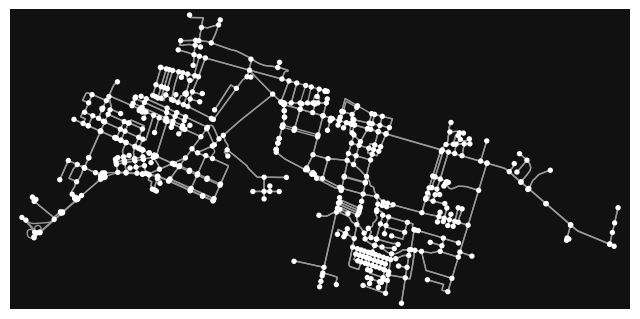

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1]:
import osmnx as ox

places = ["Peterhof"]

G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

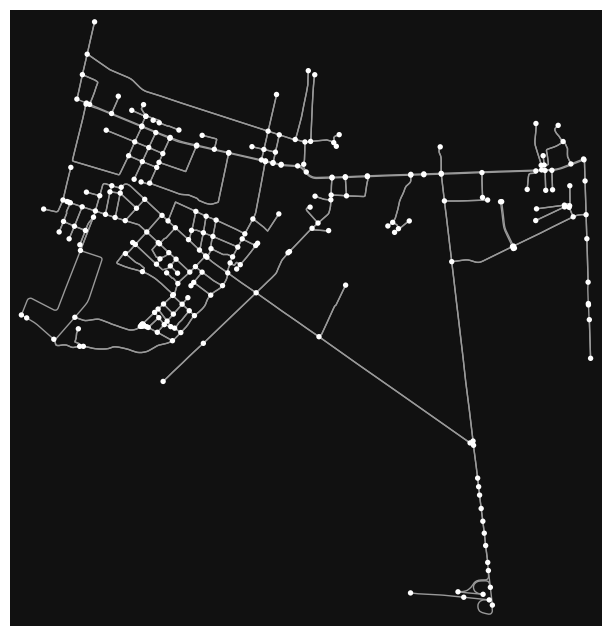

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
import osmnx as ox

places = ["Strelna"]

G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

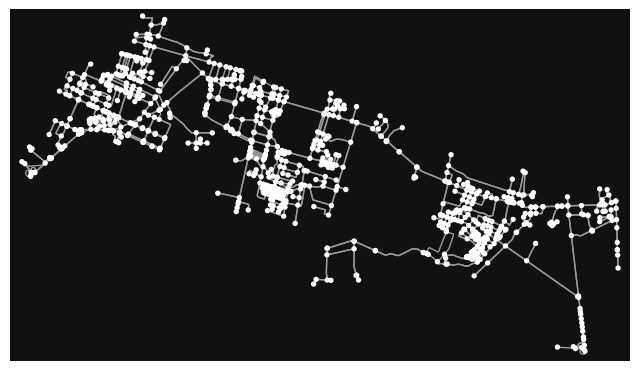

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
import osmnx as ox

places = ["Peterhof", "Strelna"]

G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

C:\Users\orenc\AppData\Local\Temp\ipykernel_14028\116595495.py:2: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(bbox = (north, south, east, west), network_type='drive')


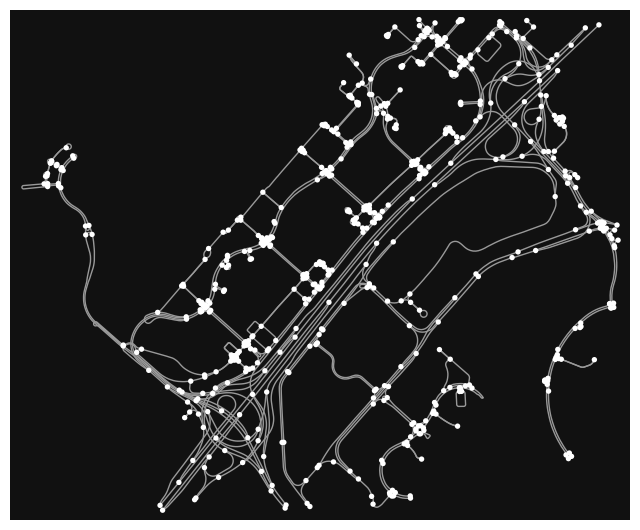

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
north, south, east, west = 25.09, 25.06, 55.16, 55.11
G = ox.graph_from_bbox(bbox = (north, south, east, west), network_type='drive')
ox.plot_graph(G)

C:\Users\orenc\AppData\Local\Temp\ipykernel_14028\3863950739.py:2: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(bbox=(max_lat, min_lat, max_lon, min_lon), network_type='all')
c:\mArt\dataScience\Practice_3sem\project's\1\.venv\lib\site-packages\osmnx\_overpass.py:254: UserWarning: This area is 15 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


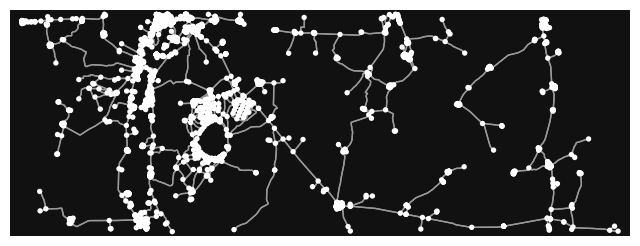

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [7]:
max_lat, min_lat, max_lon, min_lon = 51.14, 50.14, 55.30, 50.30
G = ox.graph_from_bbox(bbox=(max_lat, min_lat, max_lon, min_lon), network_type='all')
ox.plot_graph(G)

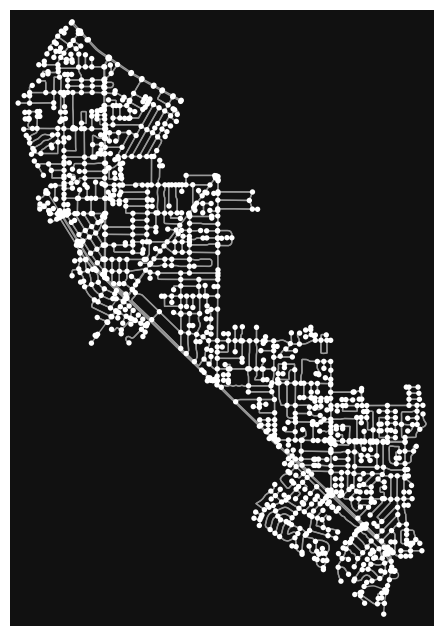

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
places = ['Los Altos, California, USA']
G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

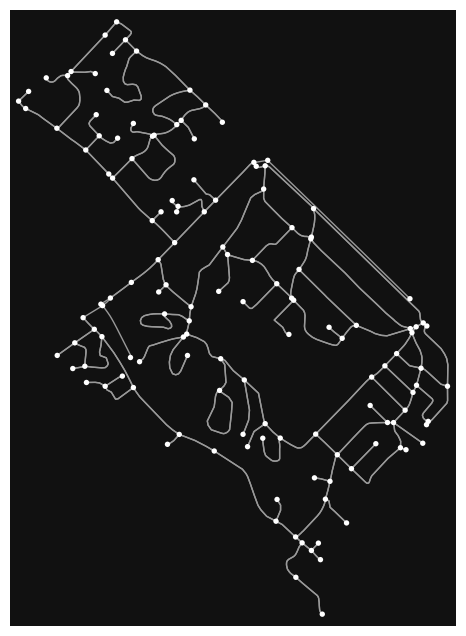

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
places = ['Loyola, California']
G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

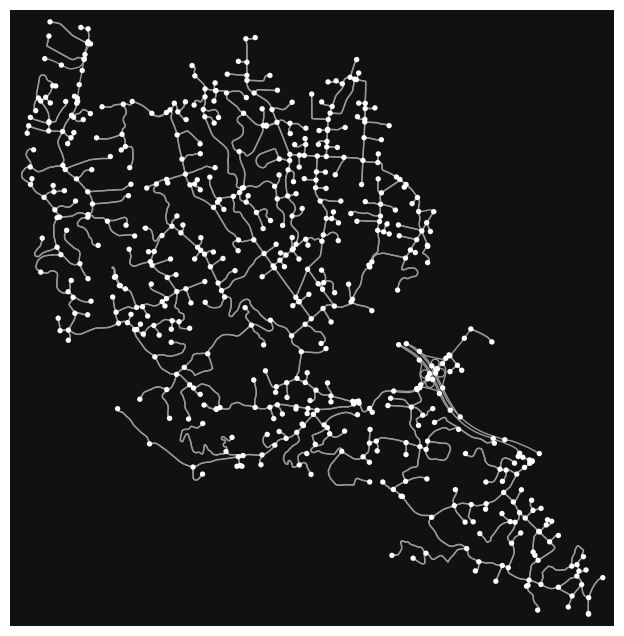

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [7]:
places = [{'city':'Los Altos Hills', 'state':'California'}]
G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

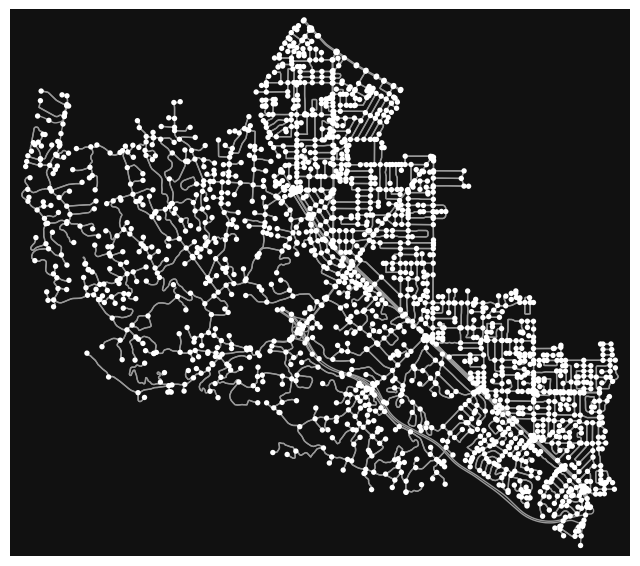

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
places = ['Los Altos, California, USA',
          {'city':'Los Altos Hills', 'state':'California'},
          'Loyola, California']
G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

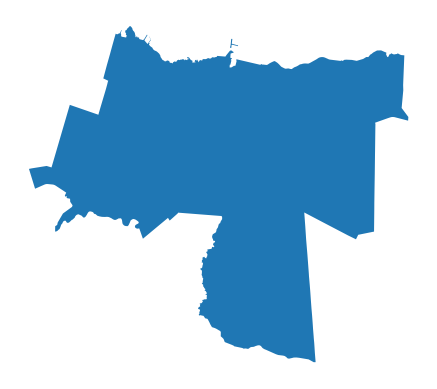

In [11]:
places = ox.geocode_to_gdf(["Strelna"])
places = ox.project_gdf(places)
ax = places.plot()
_ = ax.axis('off')

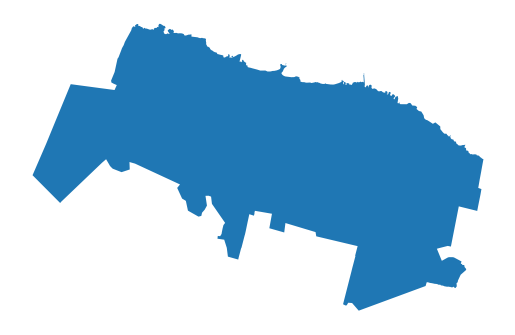

In [10]:
places = ox.geocode_to_gdf(["Peterhof"])
places = ox.project_gdf(places)
ax = places.plot()
_ = ax.axis('off')

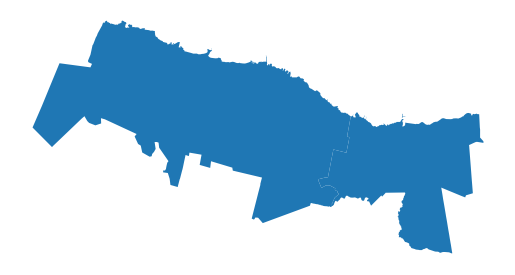

In [9]:
places = ox.geocode_to_gdf(["Peterhof", "Strelna"])
places = ox.project_gdf(places)
ax = places.plot()
_ = ax.axis('off')

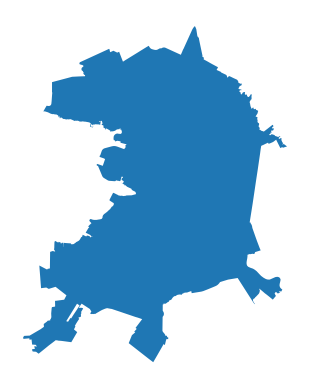

In [14]:
places = ox.geocode_to_gdf(["Saint Petersburg"])
places = ox.project_gdf(places)
ax = places.plot()
_ = ax.axis('off')

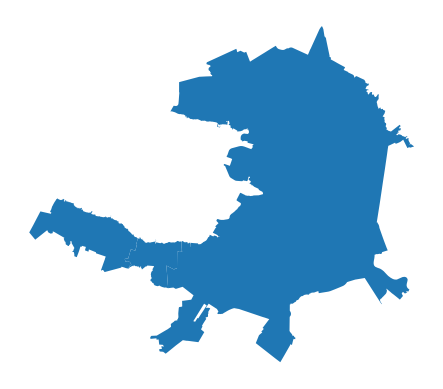

In [15]:
places = ox.geocode_to_gdf(["Peterhof", "Strelna", "Saint Petersburg"])
places = ox.project_gdf(places)
ax = places.plot()
_ = ax.axis('off')

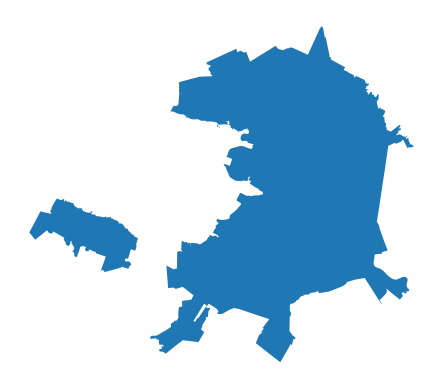

In [16]:
places = ox.geocode_to_gdf(["Peterhof", "Saint Petersburg"])
places = ox.project_gdf(places)
ax = places.plot()
_ = ax.axis('off')

In [21]:
places = ox.geocode_to_gdf(["Peterhof", "Saint Petersburg"])
places

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((29.78685 59.86583, 29.79987 59.85866...",59.902138,59.828827,30.009010,29.786848,150370654,relation,367377,59.881847,29.912041,boundary,administrative,14,0.213395,town,Peterhof,"Peterhof, Saint Petersburg, Northwestern Feder..."
1,"POLYGON ((30.04334 59.76418, 30.04382 59.76239...",60.090737,59.744148,30.567166,30.043343,181978986,relation,421007,59.938732,30.316229,place,city,16,0.797927,city,Saint Petersburg,"Saint Petersburg, Northwestern Federal Distric..."


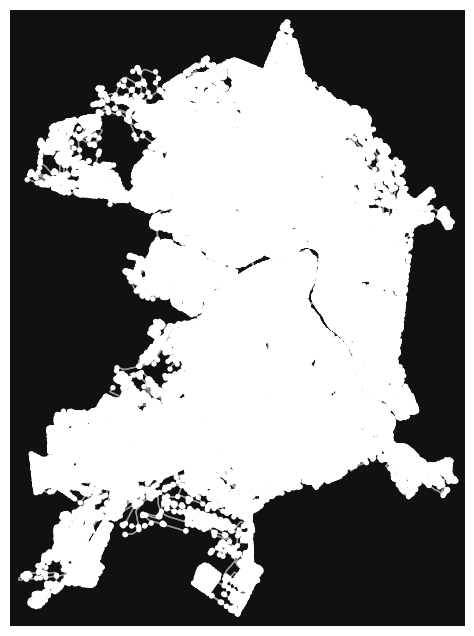

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [19]:
import osmnx as ox

places = ["Peterhof", "Saint Petersburg"]

G = ox.graph_from_place(places, network_type='all')
ox.plot_graph(G)

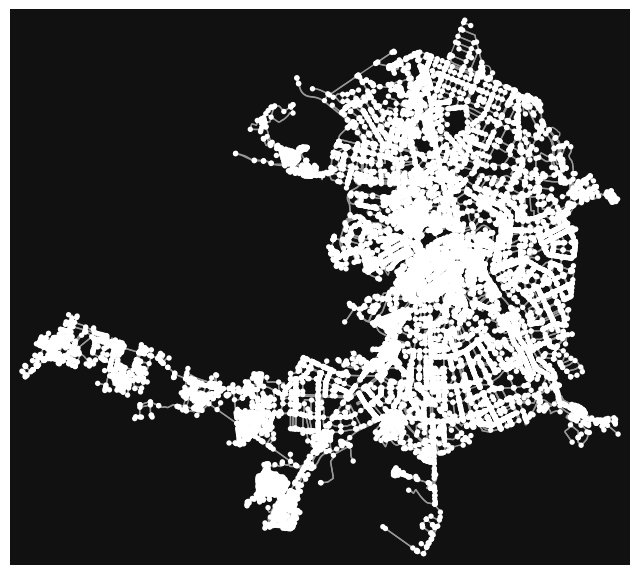

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [18]:
import osmnx as ox

places = ["Peterhof", "Strelna", "Saint Petersburg"]

G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

In [86]:
import osmnx as ox
import pandas as pd

def func(x):
    return x[0]

def func_1(x):
    gdf_1 = ox.geocode_to_gdf(x, by_osmid=True)
    return gdf_1[['lat', 'lon']]

def func_tags(tags, city):
    gdf = ox.features_from_place(city, tags)
    gdf = gdf[['name', 'geometry', 'nodes']]
    gdf = gdf.dropna().reset_index()
    gdf['n_osmid'] = gdf['element_type'].apply(func) + gdf['osmid'].astype(str)
    ex = [gdf['n_osmid'].apply(func_1).iloc[:].values[x] for x in range(len(gdf))]
    dfs = pd.concat(ex, axis=0).reset_index(drop=True)
    gdf = gdf.merge(dfs, on=dfs.index)
    gdf = gdf.drop('key_0', axis=1)
    gdf = gdf[['name', 'lat', 'lon', 'geometry', 'nodes']]
    gdf['kind_of'] = list(tags.keys())[0]
    return gdf

# city = ["Ufa", "Orenburg"]
city = "Sochi"
tags_port = {'port' : 'cargo'}
tags_aeroway = {'aeroway' : ['aerodrome','heliport', 'airstrip']}
tags_landuse = {'landuse' : 'railway'}
tags_build = {'building' : 'warehouse'}
# full_df = pd.concat([func_tags(tags_port, city), func_tags(tags_aeroway, city), func_tags(tags_landuse, city), func_tags(tags_build, city)], ignore_index=True)

full_df = func_tags(tags_aeroway, city)
full_df

,name,lat,lon,geometry,nodes,kind_of
0,Сочи,43.443971,39.940093,"POLYGON ((39.93241 43.44645, 39.93257 43.44651...","[[[717584748, 5879490143, 7724184938, 58794901...",aeroway
1,Бочаров Ручей,43.619164,39.704447,"MULTIPOLYGON (((39.70695 43.61697, 39.70694 43...","[[[668592019, 668592123, 668592115, 668592116,...",aeroway


In [87]:
tags = {'aeroway' : ['aerodrome','heliport', 'airstrip']}
cities = ['Moscow', 'Saint Petersburg']
full_df = func_tags(tags, cities)
# gdf = ox.features_from_place(cities, tags)
full_df

c:\mArt\dataScience\Practice_3sem\project's\1\.venv\lib\site-packages\osmnx\_overpass.py:254: UserWarning: This area is 18 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


,name,lat,lon,geometry,nodes,kind_of
0,Горка,55.738718,37.003107,"POLYGON ((37.00081 55.73957, 37.00227 55.73716...","[9029885858, 9029885857, 9029885856, 902988585...",aeroway
1,Аэропорт Внуково,55.599528,37.273575,"POLYGON ((37.23879 55.59322, 37.23891 55.59363...","[[[7739541578, 2279062028], [7739329393, 22790...",aeroway
2,Остафьево,55.512412,37.506741,"POLYGON ((37.50574 55.52229, 37.50669 55.52214...","[[[7709909566, 7709620022, 7709620043, 1788488...",aeroway
3,Национальная Служба Санитарной Авиации,59.827914,30.251668,"POLYGON ((30.25103 59.82901, 30.25108 59.82903...","[3770275444, 3362957480, 3770275445, 376706017...",aeroway
4,Пулково,59.801699,30.267601,"POLYGON ((30.19901 59.80180, 30.19927 59.80236...","[[[1366336215, 898627137, 898627136, 898627135...",aeroway
5,Горелово,59.770235,30.089544,"POLYGON ((30.08709 59.77654, 30.08712 59.77653...","[[[2583764932, 5154999590, 2583764933, 5154999...",aeroway


In [94]:
import networkx as nx
graphs = [ox.graph_from_place("Saint Petersburg", retain_all=True, simplify = True, network_type='drive'), 
          ox.graph_from_place("Moscow", retain_all=True, simplify = True, network_type='drive')]
full_graph = nx.compose_all(graphs)

lat = list(full_df['lat'].values)
lon = list(full_df['lon'].values)
full_df['new_nodes'] = ox.distance.nearest_nodes(full_graph, lon, lat)
full_df.head()

,name,lat,lon,geometry,nodes,kind_of,new_nodes
0,Горка,55.738718,37.003107,"POLYGON ((37.00081 55.73957, 37.00227 55.73716...","[9029885858, 9029885857, 9029885856, 902988585...",aeroway,721138500
1,Аэропорт Внуково,55.599528,37.273575,"POLYGON ((37.23879 55.59322, 37.23891 55.59363...","[[[7739541578, 2279062028], [7739329393, 22790...",aeroway,5732603250
2,Остафьево,55.512412,37.506741,"POLYGON ((37.50574 55.52229, 37.50669 55.52214...","[[[7709909566, 7709620022, 7709620043, 1788488...",aeroway,864650675
3,Национальная Служба Санитарной Авиации,59.827914,30.251668,"POLYGON ((30.25103 59.82901, 30.25108 59.82903...","[3770275444, 3362957480, 3770275445, 376706017...",aeroway,1314377080
4,Пулково,59.801699,30.267601,"POLYGON ((30.19901 59.80180, 30.19927 59.80236...","[[[1366336215, 898627137, 898627136, 898627135...",aeroway,2520681689


In [101]:
import networkx as nx
route = nx.shortest_path(full_graph, 864650675, 2520681689)
fig, ax = ox.plot_graph_route(full_graph, route, route_linewidth=6, node_size=0, bgcolor='k')

NetworkXNoPath: No path between 864650675 and 2520681689.

In [102]:
import networkx as nx
G = ox.graph_from_place("Russia", retain_all=True, simplify = True, network_type='drive')

lat = list(full_df['lat'].values)
lon = list(full_df['lon'].values)
full_df['new_nodes'] = ox.distance.nearest_nodes(G, lon, lat)
full_df.head()

c:\mArt\dataScience\Practice_3sem\project's\1\.venv\lib\site-packages\osmnx\_overpass.py:254: UserWarning: This area is 14,080 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


ReadTimeout: HTTPSConnectionPool(host='overpass-api.de', port=443): Read timed out. (read timeout=180)